In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

In [75]:
df = pd.read_csv('Combined_Data.csv')

In [76]:
df.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.1.66-192.168.1.68-21-52206-6,192.168.1.68,52206,192.168.1.66,21,6,15/06/2025 06:32:48 PM,18640,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
1,192.168.1.66-192.168.1.68-21-52174-6,192.168.1.68,52174,192.168.1.66,21,6,15/06/2025 06:32:48 PM,18798,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
2,192.168.1.66-192.168.1.68-21-52174-6,192.168.1.66,21,192.168.1.68,52174,6,15/06/2025 06:32:48 PM,14,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
3,192.168.1.66-192.168.1.68-21-52192-6,192.168.1.68,52192,192.168.1.66,21,6,15/06/2025 06:32:48 PM,19044,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
4,192.168.1.66-192.168.1.68-21-52252-6,192.168.1.68,52252,192.168.1.66,21,6,15/06/2025 06:32:48 PM,18649,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce


In [77]:
df.shape

(736505, 84)

In [78]:
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

In [79]:
df.dtypes

Flow ID       object
Src IP        object
Src Port       int64
Dst IP        object
Dst Port       int64
              ...   
Idle Mean    float64
Idle Std     float64
Idle Max     float64
Idle Min     float64
Label         object
Length: 84, dtype: object

In [80]:
df.isnull().sum().sum()

np.int64(3403)

In [81]:
df.select_dtypes(include='object').columns

Index(['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label'], dtype='object')

In [82]:
df = df.dropna()

In [83]:
df = df.drop(columns=['Flow ID', 'Src IP', 'Dst IP', 'Timestamp'])

In [84]:
df.head(5)

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,52206,21,6,18640,5,5,27.0,75.0,15.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
1,52174,21,6,18798,5,5,28.0,75.0,16.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
2,21,52174,6,14,1,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
3,52192,21,6,19044,5,5,27.0,75.0,15.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
4,52252,21,6,18649,5,5,27.0,75.0,15.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce


In [85]:
df['Label'].unique()

array(['BruteForce', 'DDOS', 'Normal', 'PortScan', 'SqlInjection'],
      dtype=object)

In [86]:
attack_counts = df['Label'].value_counts()

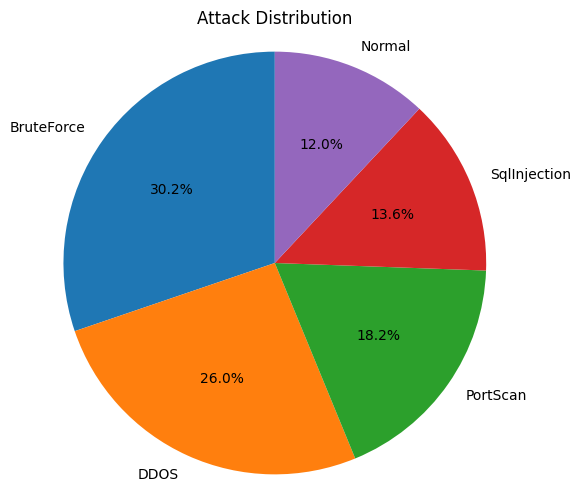

In [87]:
plt.figure(figsize=(6,6))
plt.pie(attack_counts.values, labels=attack_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Attack Distribution')
plt.axis('equal')
plt.show()

In [88]:
df.shape

(733102, 80)

In [89]:
df_corr = df.drop(columns=['Label'])

In [90]:
corr_matrix = df_corr.corr().abs()

In [91]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [92]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [93]:
df_reduced = df.drop(columns=to_drop)

In [94]:
print("Dropped columns due to high correlation (> 0.90):")
print(to_drop)

Dropped columns due to high correlation (> 0.90):
['TotLen Bwd Pkts', 'Fwd Pkt Len Std', 'Bwd Pkt Len Std', 'Flow IAT Min', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd Header Len', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'PSH Flag Cnt', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Fwd Act Data Pkts', 'Active Max', 'Idle Mean', 'Idle Max', 'Idle Min']


In [95]:
df_reduced.shape

(733102, 55)

In [96]:
df_reduced.head(5)

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Active Min,Idle Std,Label
0,52206,21,6,18640,5,5,27.0,15.0,0.0,5.4,...,0,0,-1,255,0,0.0,0.0,0.0,0.0,BruteForce
1,52174,21,6,18798,5,5,28.0,16.0,0.0,5.6,...,0,0,-1,255,0,0.0,0.0,0.0,0.0,BruteForce
2,21,52174,6,14,1,1,0.0,0.0,0.0,0.0,...,0,0,-1,255,0,0.0,0.0,0.0,0.0,BruteForce
3,52192,21,6,19044,5,5,27.0,15.0,0.0,5.4,...,0,0,-1,255,0,0.0,0.0,0.0,0.0,BruteForce
4,52252,21,6,18649,5,5,27.0,15.0,0.0,5.4,...,0,0,-1,255,0,0.0,0.0,0.0,0.0,BruteForce


In [97]:
df_reduced['Label'] = df['Label']

In [98]:
df_reduced.columns

Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Tot', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Fwd Pkts/s',
       'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Min', 'Idle Std', 'Label

In [99]:
df_reduced.shape

(733102, 55)

In [100]:
df_reduced = df_reduced.replace([np.inf, -np.inf], np.nan)

In [103]:
df_reduced = df_reduced.dropna()
X = df_reduced.drop('Label', axis=1)
y = df_reduced['Label']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# If you want a DataFrame back
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Label')], axis=1)

In [104]:
attack_counts = df_balanced['Label'].value_counts()

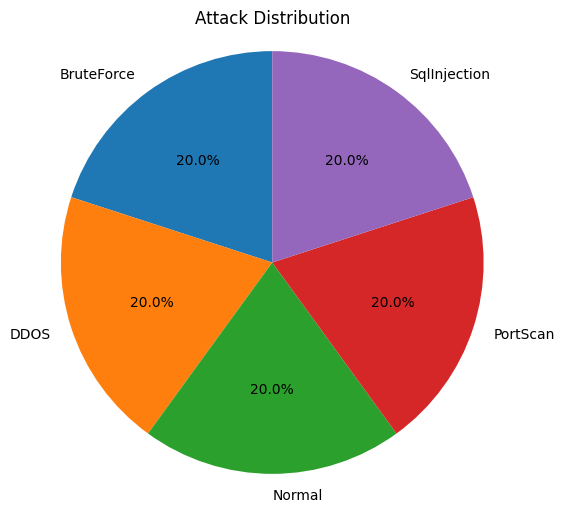

In [105]:
plt.figure(figsize=(6,6))
plt.pie(attack_counts.values, labels=attack_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Attack Distribution')
plt.axis('equal')
plt.show()

In [106]:
df_balanced.columns

Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Tot', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Fwd Pkts/s',
       'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Min', 'Idle Std', 'Label

In [107]:
df_balanced.shape

(1107965, 55)

In [108]:
df_balanced.to_csv('processed_dataset.csv', index=False)